In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm, t, gennorm, logistic
import matplotlib.pyplot as plt
import scipy.stats as st
import statistics


In [3]:
eu = pd.read_csv("data//CHFEUR.csv")
usd = pd.read_csv("data//CHFUSD.csv")

eu['Log_Returns'] = np.log(eu['Open'] / eu['Open'].shift(1))
usd['Log_Returns'] = np.log(usd['Open'] / usd['Open'].shift(1))

eu_returns = eu['Log_Returns'].dropna()
usd_returns = usd['Log_Returns'].dropna()

print(len(eu_returns))


1305


In [4]:
print(len(usd_returns))

1303


In [5]:
combined_data = pd.merge(eu, usd, on='Date', suffixes=('_eu', '_usd'))

combined_data['Log_Returns_eu'] = np.log(combined_data['Open_eu'] / combined_data['Open_eu'].shift(1))
combined_data['Log_Returns_usd'] = np.log(combined_data['Open_usd'] / combined_data['Open_usd'].shift(1))

combined_data = combined_data.dropna(subset=['Log_Returns_eu', 'Log_Returns_usd'])

eu_returns = combined_data['Log_Returns_eu']
usd_returns = combined_data['Log_Returns_usd']

print(eu_returns)
print(usd_returns)

1      -0.003586
2      -0.001406
3      -0.002181
4      -0.004069
5       0.001278
          ...   
1301   -0.001280
1302   -0.004934
1303    0.002383
1304   -0.000204
1305    0.004729
Name: Log_Returns_eu, Length: 1303, dtype: float64
1       0.000489
2      -0.001266
3      -0.004047
4      -0.002844
5      -0.004216
          ...   
1301   -0.001840
1302   -0.002035
1303    0.002246
1304   -0.011079
1305    0.003555
Name: Log_Returns_usd, Length: 1303, dtype: float64


In [6]:
combined_data = combined_data.dropna(subset=['Log_Returns_eu', 'Log_Returns_usd'])

combined_data.reset_index(drop=True, inplace=True)

eu_returns = combined_data['Log_Returns_eu']
usd_returns = combined_data['Log_Returns_usd']

eu_returns, usd_returns

(0      -0.003586
 1      -0.001406
 2      -0.002181
 3      -0.004069
 4       0.001278
           ...   
 1298   -0.001280
 1299   -0.004934
 1300    0.002383
 1301   -0.000204
 1302    0.004729
 Name: Log_Returns_eu, Length: 1303, dtype: float64,
 0       0.000489
 1      -0.001266
 2      -0.004047
 3      -0.002844
 4      -0.004216
           ...   
 1298   -0.001840
 1299   -0.002035
 1300    0.002246
 1301   -0.011079
 1302    0.003555
 Name: Log_Returns_usd, Length: 1303, dtype: float64)

# Zadanie 1

In [7]:
# estymacja sredniej, odch.stand. i korelacji (eur,usd)

eu_time = np.array([*range(len(eu_returns))])
eu_sr = np.mean(eu_returns)
eu_odch_stand = statistics.stdev(eu_returns)
eu_korel = np.corrcoef(eu_returns, eu_time)[0][1]

print(f'Średnia dla CHF/EUR:  {eu_sr:.5f}')
print(f'Odchylenie standardowe dla CHF/EUR: {eu_odch_stand:.5f}' )
print(f'Korelacja dla CHF/EUR:  {eu_korel:.5f}')

usd_time = np.array([*range(len(usd_returns))])
usd_sr = np.mean(usd_returns)
usd_odch_stand = statistics.stdev(usd_returns)
usd_korel = np.corrcoef(usd_returns, usd_time)[0][1]
print('-----------------------------------------------------')

print(f'Średnia dla CHF/USD:  {usd_sr:.5f}')
print(f'Odchylenie standardowe dla CHF/USD: {usd_odch_stand:.4f}' )
print(f'Korelacja dla CHF/USD:  {usd_korel:.5f}') #bliska 0 więc jest dobrze


Średnia dla CHF/EUR:  0.00011
Odchylenie standardowe dla CHF/EUR: 0.00314
Korelacja dla CHF/EUR:  -0.01053
-----------------------------------------------------
Średnia dla CHF/USD:  0.00008
Odchylenie standardowe dla CHF/USD: 0.0047
Korelacja dla CHF/USD:  -0.01389


## 1a) 

In [8]:
# wagi skladowych portfela (ustalone wagi z projektu2 dla kursu CHF/EUR oraz CHF/USD)

eu_waga = 0.65 
usd_waga = 0.35

In [9]:
portfel = eu_returns *eu_waga + usd_returns*usd_waga
portfel = pd.Series(portfel) # Przygotowanie danych

print(portfel)

0      -0.002160
1      -0.001357
2      -0.002834
3      -0.003640
4      -0.000645
          ...   
1298   -0.001476
1299   -0.003919
1300    0.002335
1301   -0.004010
1302    0.004318
Length: 1303, dtype: float64


In [10]:
stopa_zwrotu_dla_portfela = eu_waga*eu_returns + usd_waga*usd_returns

print('Stopa zwrotu dla portfela: ')
print(stopa_zwrotu_dla_portfela)


Stopa zwrotu dla portfela: 
0      -0.002160
1      -0.001357
2      -0.002834
3      -0.003640
4      -0.000645
          ...   
1298   -0.001476
1299   -0.003919
1300    0.002335
1301   -0.004010
1302    0.004318
Length: 1303, dtype: float64


In [13]:
def calculate_risk_measures(returns):
    risk_measures = {
        'Średnia': returns.mean(),
        'Odchylenie standardowe': returns.std(),
        'Odchylenie przeciętne': sum(abs(returns - np.mean(returns)))/len(returns),
        'Odchylenie ćwiartkowe': 1/2 * (np.quantile(returns, .75) - np.quantile(returns, .25)),
        'Wariancja': returns.var(),
        'Skośność': returns.skew(),
        'Kurtoza': returns.kurtosis(),
        'Maksymalny spadek': (returns.cumsum() - returns.cumsum().cummax()).min(),
        'VaR (95%)': np.percentile(returns, 5),
        'CVaR (95%)': returns[returns <= np.percentile(returns, 5)].mean()
    }
    return risk_measures
m_ryzyka = calculate_risk_measures(stopa_zwrotu_dla_portfela)

miary_ryzyka_dla_portfela = pd.DataFrame(m_ryzyka, index=[0])

miary_ryzyka_dla_portfela = miary_ryzyka_dla_portfela.transpose()
miary_ryzyka_dla_portfela.columns = ['Wartość dla portfela']


print("Miary ryzyka dla portfela:")
miary_ryzyka_dla_portfela

TypeError: corr() missing 1 required positional argument: 'other'

## 1b)

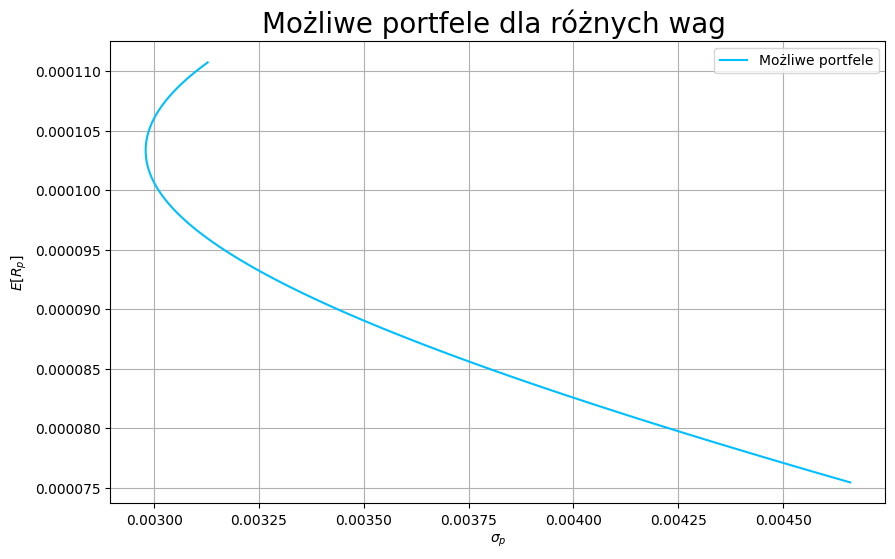

In [ ]:
def portfolio(Ra, Rb):
    w1 = np.linspace(.01, .99, 99) # różne wagi dla dwóch zmiennych ryzyka
    w2 = 1 - w1
    E = [] #oczekiwane stopy zwrotu portfela dla każdej kombinacji wag w1 i w2
    sigmas = [] #odchylenie standardowe (ryzyko) portfela dla każdej kombinacji wag w1 i w2
    for w1, w2 in zip(w1, w2):
        E.append(w1*np.mean(Ra) + w2*np.mean(Rb))
        sigmas.append(statistics.stdev(w1*Ra + w2*Rb))
    sigmas = np.array(sigmas)
    E = np.array(E)
    idx = np.where(sigmas == min(sigmas))[0][0]
    E_min = E[idx]
    return sigmas, E, min(sigmas), E_min, idx

s, E, s_min, E_min, idx = portfolio(eu_returns, usd_returns)

fig, ax = plt.subplots(figsize = (10, 6))
plt.plot(s, E, color = 'deepskyblue', label = 'Możliwe portfele', linewidth=3/2)
plt.title('Możliwe portfele dla różnych wag ', fontsize = 20)
#plt.ylim(np.min(E), np.max(E))
plt.xlabel('$\sigma_p$')
plt.ylabel('$E[R_p]$')
plt.grid()
plt.legend()
plt.show()

## 1c)

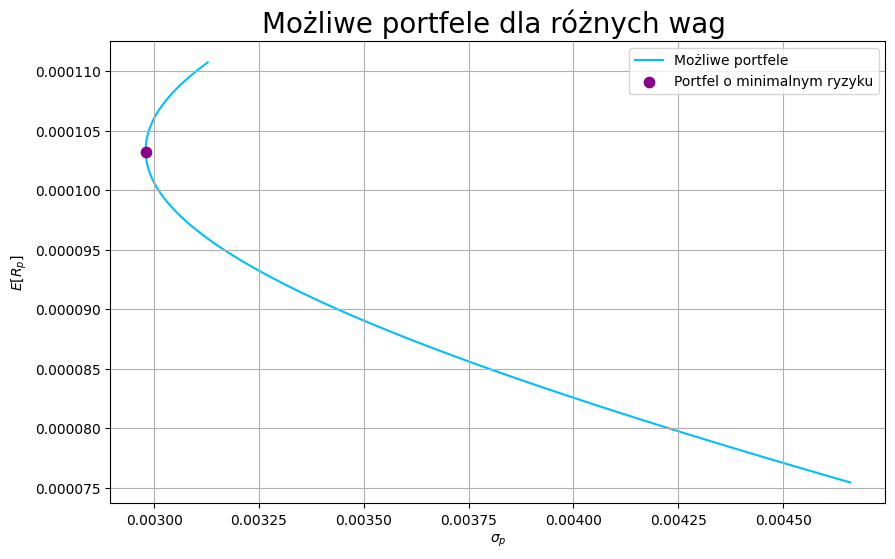

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))
plt.plot(s, E, color = 'deepskyblue', label = 'Możliwe portfele', linewidth=3/2, zorder=1)
plt.scatter(s_min, E_min,  label = 'Portfel o minimalnym ryzyku',  s=55, color="darkmagenta")
plt.title('Możliwe portfele dla różnych wag ', fontsize = 20)
#plt.ylim(np.min(E), np.max(E))
plt.xlabel('$\sigma_p$')
plt.ylabel('$E[R_p]$')
plt.grid()
plt.legend()
plt.show()

## 1d)

In [ ]:
def portfolio2(R1, R2, rate):
    w1 = np.linspace(.001, .999, 999)
    w2 = 1 - w1
    E = []
    s = []
    for w1, w2 in zip(w1, w2):
        s.append(statistics.stdev(w1*R1 + w2*R2))
        E.append(w1*np.mean(R1) + w2*np.mean(R2))
    s = np.array(s)
    E = np.array(E)
    d_rate = abs(E - rate)
    idx = np.where(d_rate == min(d_rate))[0][0]
    E_min = E[idx]
    return s, E, s[idx], E_min, idx

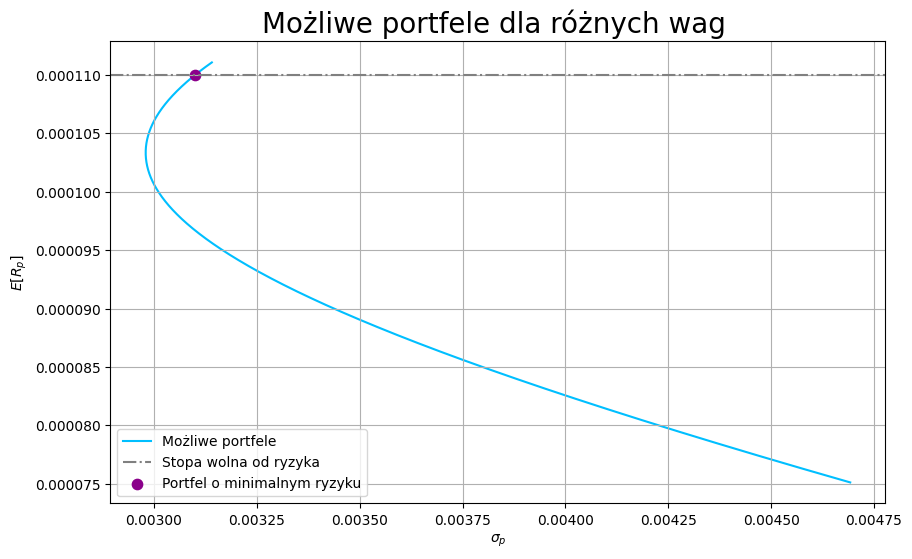

In [ ]:
s, E, s_min, E_min, idx = portfolio2(eu_returns, usd_returns, 0.00011)


fig, ax = plt.subplots(figsize = (10, 6))
plt.plot(s, E, color = 'deepskyblue', label = 'Możliwe portfele', linewidth=3/2, zorder=1)
plt.axline((min(s), E_min), (max(s), E_min), linestyle = 'dashdot', color = 'gray', 
          label = 'Stopa wolna od ryzyka')
plt.scatter(s_min, E_min,  label = 'Portfel o minimalnym ryzyku',  s=55, color="darkmagenta")
plt.title('Możliwe portfele dla różnych wag ', fontsize = 20)
#plt.ylim(np.min(E), np.max(E))
plt.xlabel('$\sigma_p$')
plt.ylabel('$E[R_p]$')
plt.grid()
plt.legend()
plt.show()

## 1e)

In [ ]:
def portfolio3(R1, R2, R_f,wf):
    w1 = np.linspace(0, 1, 999)
    w2 = 1 - w1
    E = []
    s = []
    for w1, w2 in zip(w1, w2):
        
        s.append(statistics.stdev((w1*R1 + w2*R2)*(1-wf)+wf*R_f))
        E.append(np.mean((w1*R1 + w2*R2)*(1-wf)+wf*R_f))
    s = np.array(s)
    E = np.array(E)
    ss = (E - R_f)/s
    idx = np.where(max(ss))[0][0]
    E_max = E[idx]
    return s, E, s[idx], E_max, idx

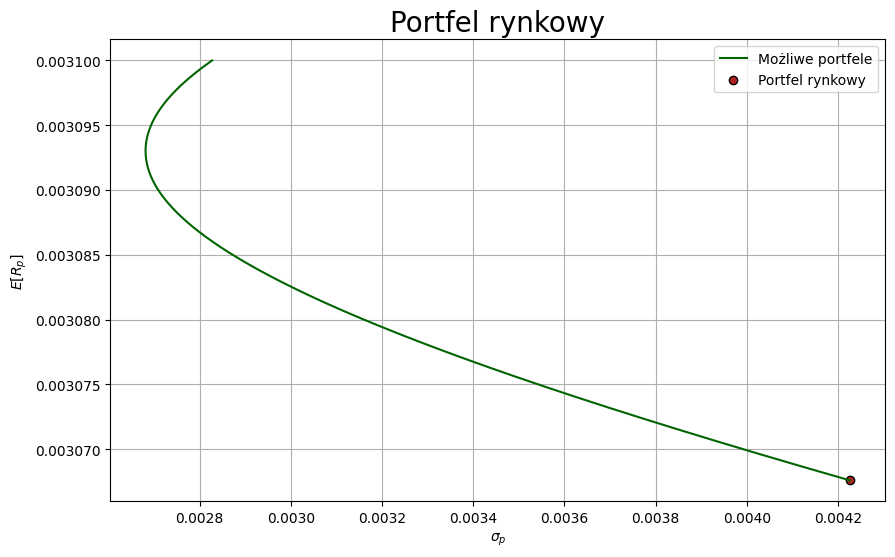

In [ ]:
s, E, s_min, E_max, idx = portfolio3(eu_returns, usd_returns, 0.03,0.1)

portfig, ax = plt.subplots(figsize = (10, 6))
plt.plot(s, E, color = 'darkgreen', label = 'Możliwe portfele')
plt.scatter(s_min, E_max, color = 'firebrick', label = 'Portfel rynkowy', edgecolors = 'black', linewidth = 1)
plt.title('Portfel rynkowy', fontsize = 20)
plt.xlabel('$\sigma_p$')
plt.ylabel('$E[R_p]$')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#  czy wykres moze byc odwrocony jak u nas, 
# procewntowe wartosci na osi xów
# jak dobrac minimalna stope ryzyka (d), 
# jakie parametry przyjac w portfelu rynkowym(e)